In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score,KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
df_heart=pd.read_csv('C:\\Users\\Ejaz\\Documents\\ML Practise\\ML code\\Jan2020\\Heart Disease Prediction\\heart.csv')
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df_heart.shape

(303, 14)

In [4]:
columns=df_heart.columns
print(len(columns))

14


In [5]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [6]:
df_heart.isnull().sum(axis=0)  ## No null values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df_heart.columns.duplicated().sum()  # No duplicate columns

0

In [8]:
df_heart[df_heart.duplicated(subset=None, keep=False)] #  duplicate row found

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [9]:
df_heart.drop(index=[164], inplace=True) # deleted duplicate row

In [10]:
df_heart.shape

(302, 14)

In [11]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Outlier Detection
#   - Boxplot
#   - Scatterplot
#   - Z-score
#   - IQR

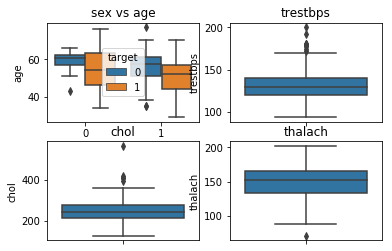

In [12]:
plt.subplot(2,2,1)
plt.title('sex vs age')
sns.boxplot(x='sex',y='age',data=df_heart, hue='target')    # No outlier
plt.subplot(2,2,2)
plt.title('trestbps')
sns.boxplot(y=df_heart['trestbps']) # outlier found
plt.subplot(2,2,3)
plt.title('chol')
sns.boxplot(y=df_heart['chol']) # outlier found
plt.subplot(2,2,4)
plt.title('thalach')
sns.boxplot(y='thalach',data=df_heart) # outlier found


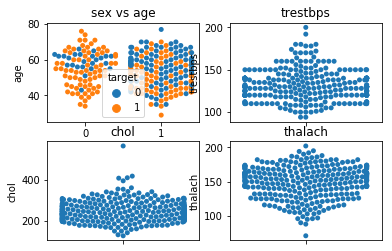

In [13]:
plt.subplot(2,2,1)
plt.title('sex vs age')
sns.swarmplot(x='sex', y='age',data=df_heart, hue='target')    # No outlier
plt.subplot(2,2,2)
plt.title('trestbps')
sns.swarmplot(y=df_heart['trestbps']) # outlier found
plt.subplot(2,2,3)
plt.title('chol')
sns.swarmplot(y=df_heart['chol']) # outlier found
plt.subplot(2,2,4)
plt.title('thalach')
sns.swarmplot(y='thalach',data=df_heart) # outlier found

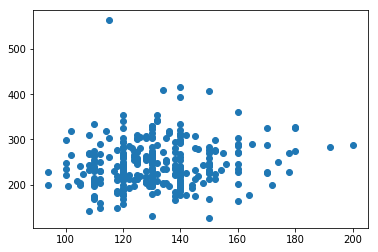

In [14]:
plt.scatter(x='trestbps',y='chol',data=df_heart)

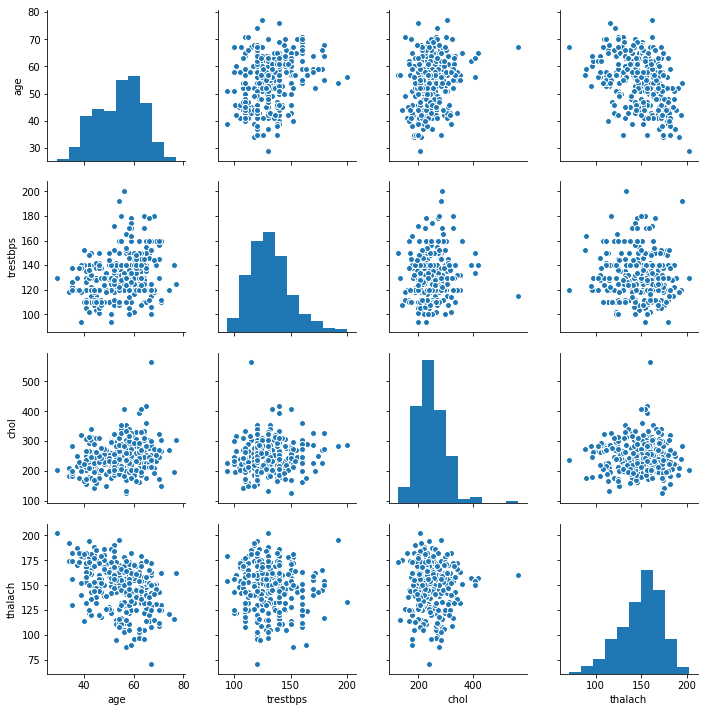

In [15]:
sns.pairplot(x_vars=['age','trestbps','chol','thalach'] , y_vars=['age','trestbps','chol','thalach'] ,data=df_heart)

In [16]:
# remove all rows that have outliers in at least one column
df_new=df_heart[(np.abs(stats.zscore(df_heart)) <3).all(axis=1)] 
print(df_new.shape)

(287, 14)


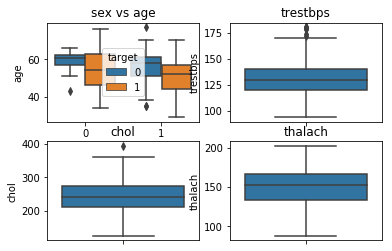

In [17]:
plt.subplot(2,2,1)
plt.title('sex vs age')
sns.boxplot(x='sex',y='age',data=df_new, hue='target')    
plt.subplot(2,2,2)
plt.title('trestbps')
sns.boxplot(y=df_new['trestbps']) 
plt.subplot(2,2,3)
plt.title('chol')
sns.boxplot(y=df_new['chol']) 
plt.subplot(2,2,4)
plt.title('thalach')
sns.boxplot(y='thalach',data=df_new) 


In [18]:
df_new.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,54.334495,0.689895,0.972125,131.024390,244.501742,0.142857,0.533101,149.804878,0.327526,1.004878,1.411150,0.658537,2.313589,0.550523
std,9.093125,0.463344,1.037373,16.991856,45.920719,0.350538,0.527017,22.550570,0.470131,1.080684,0.607311,0.924675,0.584703,0.498310
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,180.000000,394.000000,1.000000,2.000000,202.000000,1.000000,4.400000,2.000000,3.000000,3.000000,1.000000


In [19]:
corr=df_new.corr()

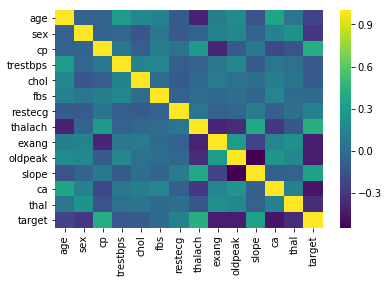

In [20]:
sns.heatmap(corr,  cmap='viridis')  # no higher correlation among the features

In [21]:
df_new.std(axis=0) # we can delete the columns having 0 standard deviation,here all are non-zero

age          9.093125
sex          0.463344
cp           1.037373
trestbps    16.991856
chol        45.920719
fbs          0.350538
restecg      0.527017
thalach     22.550570
exang        0.470131
oldpeak      1.080684
slope        0.607311
ca           0.924675
thal         0.584703
target       0.498310
dtype: float64

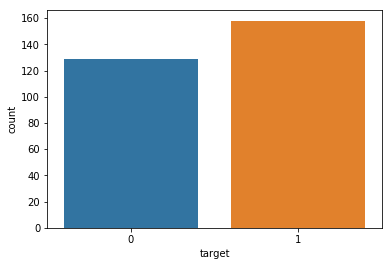

In [22]:
sns.countplot(data=df_new,x='target')  # no class imbalance problem here

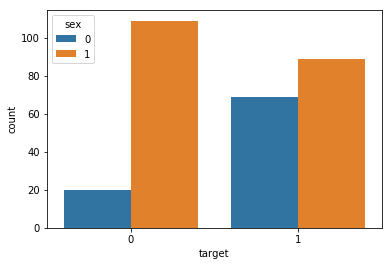

In [23]:
sns.countplot(data=df_new, x='target', hue='sex')  # taking more insight of data
#?sns.countplot()

In [24]:
#sns.catplot(x="target", hue="sex", col="fbs",
#                data=df_new, kind="count",
#                height=4, aspect=.7);
#seaborn.pydata.org/generated/seaborn.countplot.html

C:\Users\Ejaz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


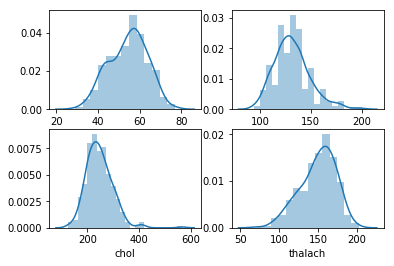

In [25]:
# check if features are normally distributed, here it is not, need to normalize
plt.subplot(2,2,1)
sns.distplot(df_heart['age'])  
plt.subplot(2,2,2)
sns.distplot(df_heart['trestbps'])
plt.subplot(2,2,3)
sns.distplot(df_heart['chol'])
plt.subplot(2,2,4)
sns.distplot(df_heart['thalach'])

#plt.hist(df_heart['age'])


In [26]:
# Data seems to be in normal distribution after removing outliers, so we can apply StandardScaler
scaler=StandardScaler()
df_heart[['age','trestbps','chol','thalach','oldpeak']]=scaler.fit_transform(df_heart[['age','trestbps','chol','thalach','oldpeak']])

In [27]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1,1
1,-1.928548,1,2,-0.091401,0.067741,0,1,1.636979,0,2.118926,0,0,2,1
2,-1.485726,0,1,-0.091401,-0.822564,0,0,0.980971,0,0.307844,2,0,2,1
3,0.174856,1,1,-0.661712,-0.203222,0,1,1.243374,0,-0.209608,2,0,2,1
4,0.285561,0,0,-0.661712,2.080602,0,1,0.587366,1,-0.382092,2,0,2,1


C:\Users\Ejaz\Anaconda3\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


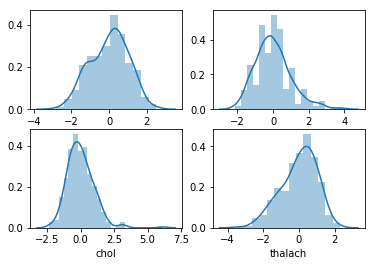

In [28]:
#COnvertd into Standard Normal Distribution, u=0,std=1

plt.subplot(2,2,1)
sns.distplot(df_heart['age'])  
plt.subplot(2,2,2)
sns.distplot(df_heart['trestbps'])
plt.subplot(2,2,3)
sns.distplot(df_heart['chol'])
plt.subplot(2,2,4)
sns.distplot(df_heart['thalach'])

In [29]:
X=df_heart.iloc[:,0:13].values
y=df_heart.iloc[:,13:14].values

In [30]:
print(type(X))
print(type(y))
print(X.shape)
print(y.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(302, 13)
(302, 1)


In [63]:
y=y.reshape(-1,)

In [64]:
print(X.shape)
print(y.shape)

(302, 13)
(302,)


In [65]:
kfold= KFold(n_splits=5, shuffle=True,random_state=10)

In [66]:
knn=KNeighborsClassifier(n_neighbors=4)

In [67]:
score= cross_val_score(estimator=knn,X=X,y=y, cv=kfold)

In [68]:
score


array([0.7704918 , 0.67213115, 0.81666667, 0.75      , 0.86666667])

In [69]:
score.mean()


0.775191256830601

In [74]:
# Hyperparameter Tuning

k=np.arange(1,30)
kfold=KFold(n_splits=5, shuffle=True, random_state=10)
cross_score=[]
for i in k:
    knn=KNeighborsClassifier(n_neighbors=i)
    knn_score=cross_val_score(estimator=knn, X=X,y=y,cv=kfold)
    cross_score.append(knn_score.mean())
    
    

In [73]:
cross_score

[0.7449180327868852,
 0.7250273224043717,
 0.7585245901639344,
 0.775191256830601,
 0.7950819672131147,
 0.7785245901639344,
 0.788415300546448,
 0.7686885245901639,
 0.7984699453551913,
 0.7816939890710384,
 0.8016393442622951,
 0.7717486338797814,
 0.7850819672131147,
 0.8016393442622951,
 0.8083606557377049,
 0.8016939890710383,
 0.8049726775956284,
 0.7950273224043717,
 0.798360655737705,
 0.8016939890710383,
 0.798360655737705,
 0.8016939890710383,
 0.8050273224043716,
 0.8017486338797815]

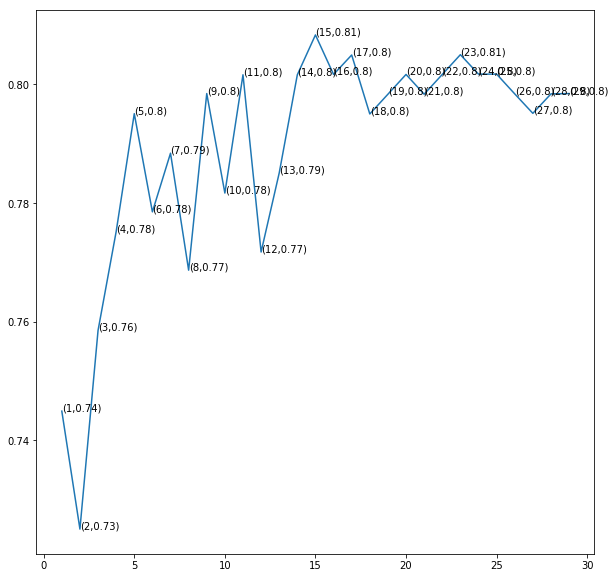

In [96]:
plt.figure(figsize=(10,10))
plt.plot(k, cross_score )
for k1,cross_score1 in zip(k, cross_score):
    plt.text(k1,cross_score1,'({},{})'.format(k1,round(cross_score1,2)))

In [100]:
#k=15 for highest score
kfold=KFold(n_splits=5,shuffle=True,random_state=10)
knn=KNeighborsClassifier(n_neighbors=15)
scores=cross_val_score(estimator=knn,X=X,y=y,cv=kfold)
scores

array([0.75409836, 0.73770492, 0.86666667, 0.81666667, 0.86666667])

In [101]:
scores.mean()

0.8083606557377049

# Random Forest

In [105]:
randf=RandomForestClassifier()

In [109]:
randscore=cross_val_score(estimator=randf,X=X,y=y,cv=kfold)
randscore

array([0.81967213, 0.70491803, 0.85      , 0.78333333, 0.8       ])

In [110]:
randscore.mean()   # we can do hyperparameter tunning to increase the accuracy

0.7915846994535519

# Logistic Regression

In [113]:
logreg= LogisticRegression()

In [114]:
logscore=cross_val_score(estimator=logreg,X=X,y=y,cv=kfold)
logscore

array([0.75409836, 0.7704918 , 0.86666667, 0.81666667, 0.9       ])

In [115]:
logscore.mean()

0.821584699453552

# Naive Bayes

In [119]:
# as the features are continuous, we can go for Gaussian Naive Bayes
gausnb=GaussianNB()

In [120]:
nb_score=cross_val_score(estimator=gausnb, X=X,y=y,cv=kfold)
nb_score

array([0.7704918 , 0.73770492, 0.9       , 0.8       , 0.83333333])

In [121]:
nb_score.mean()

0.8083060109289617